In [92]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.api as sm

#for readable figures
pd.set_option('float_format', '{:f}'.format)


from IPython.display import display, HTML
pd.get_option("display.max_columns")



20

In [93]:
iris = load_iris()
##iris.keys()


df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])


display(df.head(10))
display(df.tail(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100000,3.500000,1.400000,0.200000,0.000000
1,4.900000,3.000000,1.400000,0.200000,0.000000
2,4.700000,3.200000,1.300000,0.200000,0.000000
3,4.600000,3.100000,1.500000,0.200000,0.000000
4,5.000000,3.600000,1.400000,0.200000,0.000000
5,5.400000,3.900000,1.700000,0.400000,0.000000
6,4.600000,3.400000,1.400000,0.300000,0.000000
7,5.000000,3.400000,1.500000,0.200000,0.000000
8,4.400000,2.900000,1.400000,0.200000,0.000000
9,4.900000,3.100000,1.500000,0.100000,0.000000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.700000,3.100000,5.600000,2.400000,2.000000
141,6.900000,3.100000,5.100000,2.300000,2.000000
142,5.800000,2.700000,5.100000,1.900000,2.000000
143,6.800000,3.200000,5.900000,2.300000,2.000000
144,6.700000,3.300000,5.700000,2.500000,2.000000
145,6.700000,3.000000,5.200000,2.300000,2.000000
146,6.300000,2.500000,5.000000,1.900000,2.000000
147,6.500000,3.000000,5.200000,2.000000,2.000000
148,6.200000,3.400000,5.400000,2.300000,2.000000
149,5.900000,3.000000,5.100000,1.800000,2.000000


In [94]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

x = df.loc[:, df.columns != 'target']
y = df.loc[:, df.columns == 'target']

trainX, testX, trainY, testY = train_test_split(x, y.values.ravel(), test_size = 0.2)


In [95]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [96]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.93
Error rate: 0.07


In [97]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

array([0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333])

In [98]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.03)


In [99]:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]


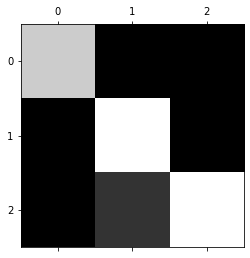

In [100]:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [101]:
probability = log_reg.predict_proba(testX)
probability

array([[1.10111174e-02, 7.94458169e-01, 1.94530714e-01],
       [7.08632331e-03, 8.84724457e-01, 1.08189220e-01],
       [1.43300510e-03, 6.63911020e-01, 3.34655975e-01],
       [8.99868859e-03, 9.19777147e-01, 7.12241640e-02],
       [3.71035974e-03, 7.84526664e-01, 2.11762977e-01],
       [2.96249110e-03, 8.08918094e-01, 1.88119414e-01],
       [2.40669508e-06, 3.89006539e-02, 9.61096939e-01],
       [1.22017238e-04, 1.64413010e-01, 8.35464973e-01],
       [8.97049005e-05, 6.97856304e-02, 9.30124665e-01],
       [1.96691195e-02, 9.49492376e-01, 3.08385041e-02],
       [9.79156188e-01, 2.08437095e-02, 1.02487018e-07],
       [9.75377347e-01, 2.46225431e-02, 1.09618684e-07],
       [2.86047377e-02, 9.22185975e-01, 4.92092877e-02],
       [2.42499985e-05, 2.76801335e-02, 9.72295617e-01],
       [2.01458320e-02, 9.41517019e-01, 3.83371487e-02],
       [6.47226291e-03, 8.07957078e-01, 1.85570659e-01],
       [1.00342903e-04, 1.64533617e-01, 8.35366040e-01],
       [9.71170471e-01, 2.88293

In [102]:
print(probability.shape[0])
print(testX.shape[0])

30
30


In [103]:
df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()

,0.000000,1.000000,2.000000
0,0.011011,0.794458,0.194531
1,0.007086,0.884724,0.108189
2,0.001433,0.663911,0.334656
3,0.008999,0.919777,0.071224
4,0.003710,0.784527,0.211763


In [104]:
df['sum'] = df.sum(axis=1)
df.head()


,0.0,1.0,2.0,sum
0,0.011011,0.794458,0.194531,1.000000
1,0.007086,0.884724,0.108189,1.000000
2,0.001433,0.663911,0.334656,1.000000
3,0.008999,0.919777,0.071224,1.000000
4,0.003710,0.784527,0.211763,1.000000


In [105]:
df['predicted_class'] = y_pred
df.head()

,0.0,1.0,2.0,sum,predicted_class
0,0.011011,0.794458,0.194531,1.000000,1.000000
1,0.007086,0.884724,0.108189,1.000000,1.000000
2,0.001433,0.663911,0.334656,1.000000,1.000000
3,0.008999,0.919777,0.071224,1.000000,1.000000
4,0.003710,0.784527,0.211763,1.000000,1.000000


In [107]:
df['actual_class'] = testY.reset_index().drop(columns='index')
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'